In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
import seaborn as sns
from IPython.display import display, Math, Latex
import re
import matplotlib.colors as mcolors
from data_utils import plot_workload
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.ticker as mtick
from matplotlib import gridspec

HOME_DIR = os.getcwd()

In [2]:
os.chdir(HOME_DIR)
os.chdir("../experiment_results/rho_multiples") 
files = ['uniform.csv', 
         'unimodal_1.csv', 'unimodal_2.csv', 'unimodal_3.csv', 'unimodal_4.csv', 
         'bimodal_1.csv', 'bimodal_2.csv', 'bimodal_3.csv', 'bimodal_4.csv', 'bimodal_5.csv', 'bimodal_6.csv',
         'trimodal_1.csv', 'trimodal_2.csv', 'trimodal_3.csv', 'trimodal_4.csv'
        ]

## Plots With Error Bars

Ran each trial $5$ times. 

In [3]:
palette = sns.color_palette("hls", 7)
palette[3] = (0.95, 0.2, 0.34)
palette[0] = (0.0, 1.0, 0.0)
palette[2] = (1.0, 0.847, 0.659)

def plot_rho_multiples(filename, fig, ax, xmin=None, xmax=None, ymin=None, ymax=None):
    df = pd.read_csv(filename)
    name = filename.split('.')[0]
    name = name.replace('_', ' ')
    name = name.capitalize()
    df['Percent Change'] = (df['Robust Cost'] - df['Nominal Cost'])/df['Nominal Cost']
    percent_change = df.groupby(['Epsilon', 'Rho Multiplier'])['Percent Change'].apply(np.array).reset_index()
    percent_change['mean'] = percent_change['Percent Change'].apply(lambda x: x.mean())
    percent_change['error'] = percent_change['Percent Change'].apply(lambda x: x.std()/np.sqrt(len(x)))
    
    for i, mult in enumerate(percent_change['Rho Multiplier'].unique()): 
        selection = percent_change[percent_change['Rho Multiplier'] == mult]
        ax.errorbar(selection['Epsilon'].to_numpy(), selection['mean'].to_numpy(), yerr=selection['error'].to_numpy(), label=rf'Robust ($\,\rho \cdot ${mult})', color=palette[i])

    if xmin != None and xmax != None: 
        ax.set_xlim(xmin, xmax)
    if ymin != None and ymax != None: 
        ax.set_ylim(ymin, ymax)
        
    ax.axhline(y=0, color='black', linestyle="--", label="Nominal")
    ax.legend()
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Percent Change in Cost')
    title = "Rho multiples and Percent Change: " + name
    ax.set_title(title)

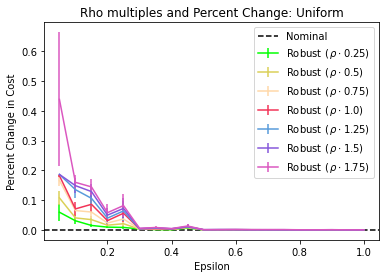

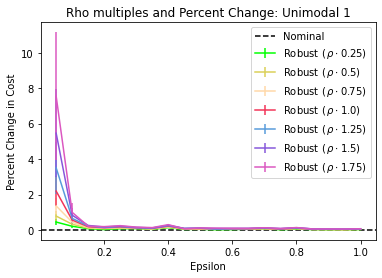

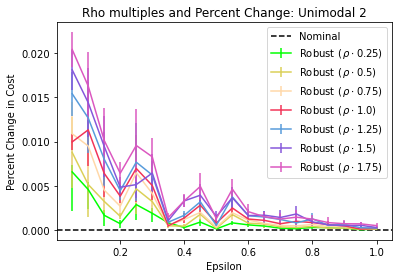

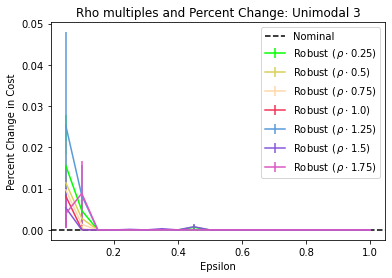

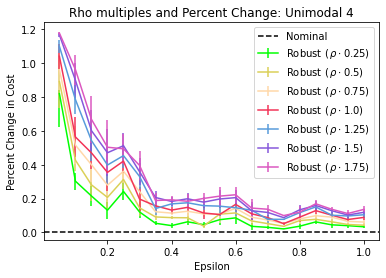

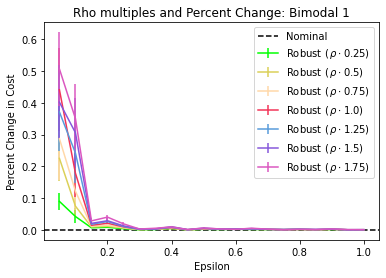

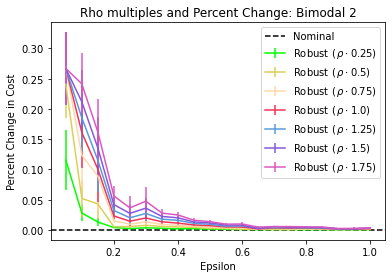

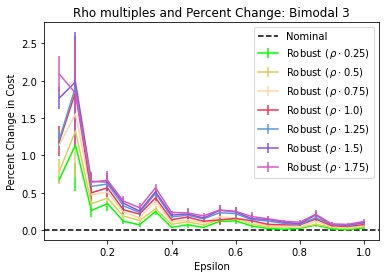

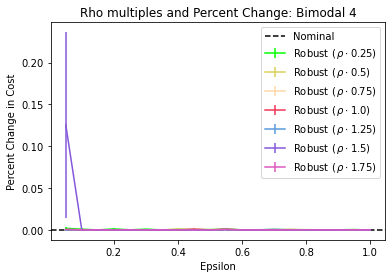

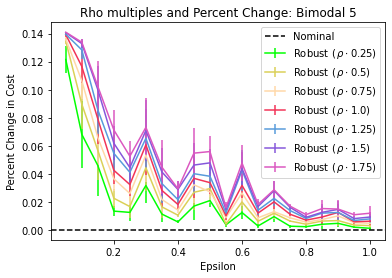

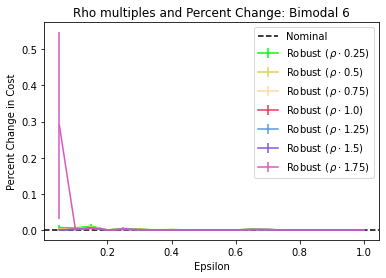

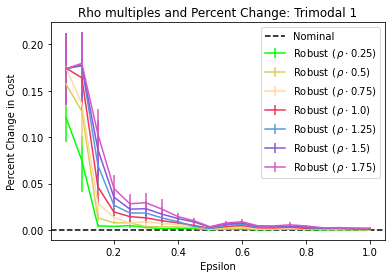

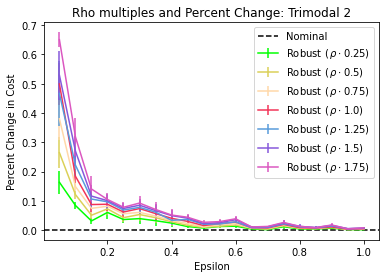

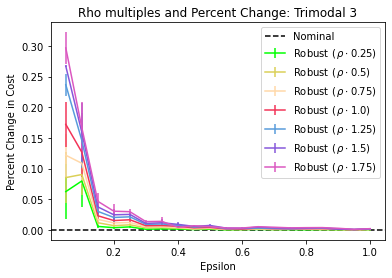

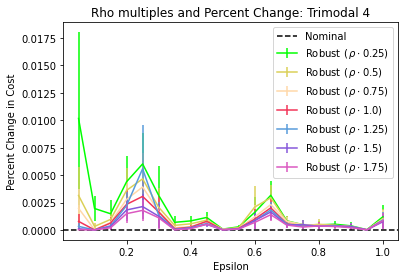

In [4]:
for file_num in range(len(files)): 
    fig, ax = plt.subplots(figsize=(6, 4)) 
    plot_rho_multiples(files[file_num], fig, ax)
    plt.show()

I think what this tells us is our $\rho$ multiplier step size is too small, since the error bars are overlapping with one another. Maybe for our final graphs, we can just pick three: $[0.25, 1, 1.75]$. The largest error bars are for $\varepsilon \leq 0.2$, which are also the regions where differential privacy has the largest effect on increasing the robust cost. 

## Plots Without Error Bars

Each point is the average out of $5$ trials. 

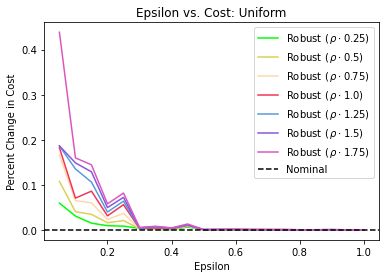

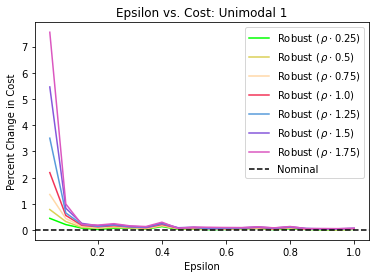

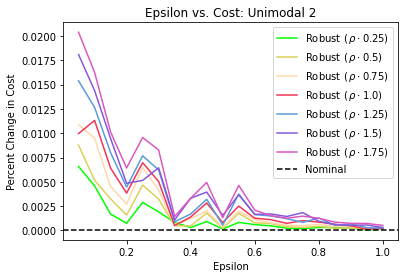

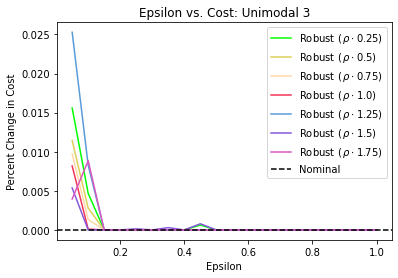

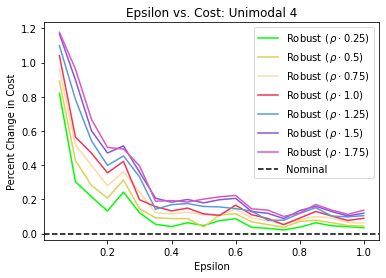

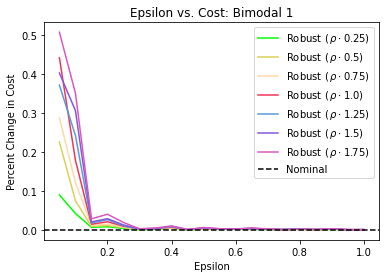

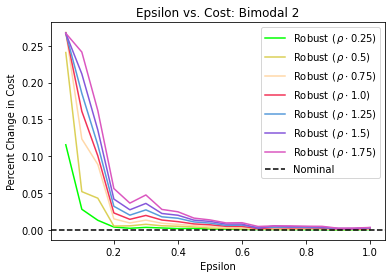

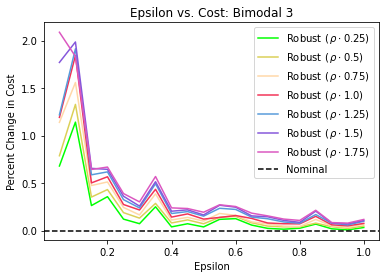

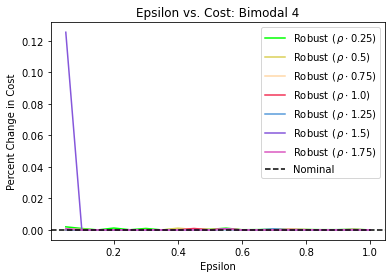

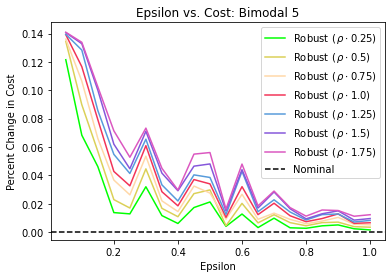

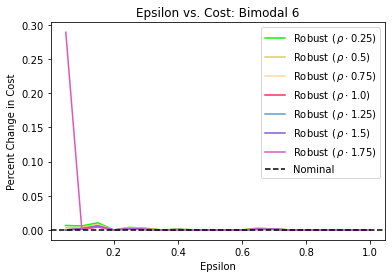

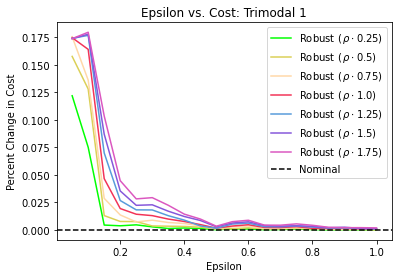

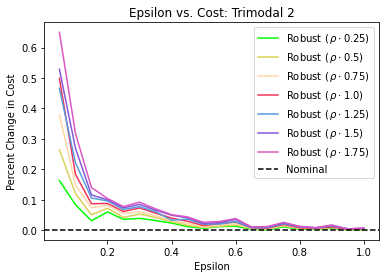

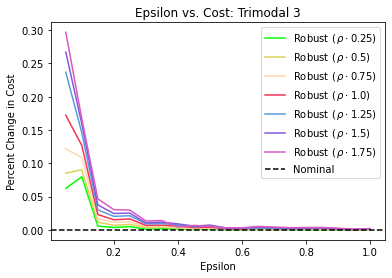

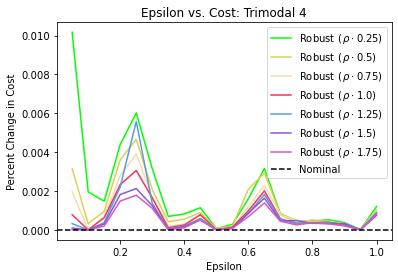

In [5]:
palette = sns.color_palette("hls", 7)
palette[3] = (0.95, 0.2, 0.34)
palette[0] = (0.0, 1.0, 0.0)
palette[2] = (1.0, 0.847, 0.659)

for file_num in range(len(files)): 
    df = pd.read_csv(files[file_num])
    name = files[file_num].split('.')[0]
    name = name.replace('_', ' ')
    name = name.capitalize()
    df['Percent Change'] = (df['Robust Cost'] - df['Nominal Cost'])/df['Nominal Cost']
    percent_change = df.groupby(['Epsilon', 'Rho Multiplier'])['Percent Change'].apply(np.array).reset_index()
    percent_change['mean'] = percent_change['Percent Change'].apply(lambda x: x.mean())
    percent_change['error'] = percent_change['Percent Change'].apply(lambda x: x.std()/np.sqrt(len(x)))
    
    for i, mult in enumerate(percent_change['Rho Multiplier'].unique()): 
        selection = percent_change[percent_change['Rho Multiplier'] == mult]
        plt.plot(selection['Epsilon'].to_numpy(), selection['mean'].to_numpy(), label=rf'Robust ($\,\rho \cdot ${mult})', color=palette[i])

    plt.axhline(y=0, color='black', linestyle="--", label="Nominal")
    plt.legend()
    plt.xlabel('Epsilon')
    plt.ylabel('Percent Change in Cost')
    title = "Epsilon vs. Cost: " + name
    plt.title(title)
    plt.show()

## Workload Plots

#### Inverted $\rho$ Multiples Workload

Average True ρ: 0.05634
Standard Dev True ρ: 0.18096


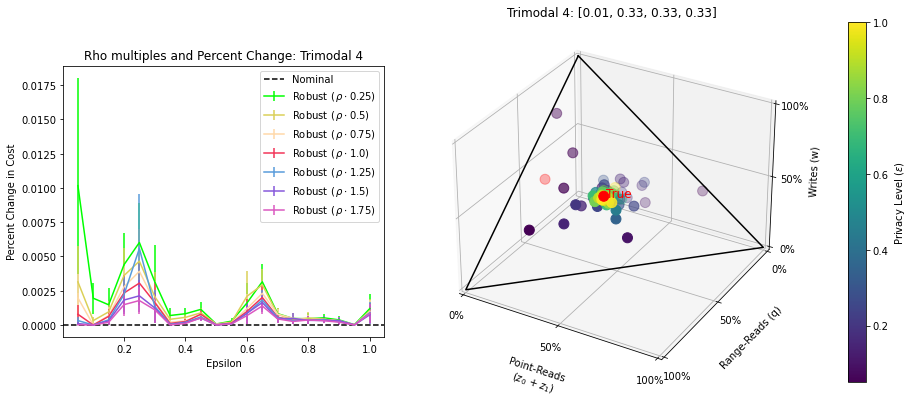

In [6]:
inverted_rho = 'Trimodal_4.csv'
df = pd.read_csv(inverted_rho)
print("Average True \u03C1:", round(df['Rho (True)'].mean(), 5))
print("Standard Dev True \u03C1:", round(df['Rho (True)'].std(), 5))


fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 0.3, 1])
ax1 = fig.add_subplot(gs[0])
plot_rho_multiples(inverted_rho, fig, ax1)

# color_range is a list of min, max for the gradient, if none is given, it automatically scales
ax2 = Axes3D(fig, auto_add_to_figure=False, computed_zorder=False)
fig.add_axes(ax2)
plot_workload(inverted_rho, fig, ax2, anchor=(0.01, 0)) 

There are a few workloads where the point queries distribution is quite different from the original, such as the ones not in the cluster in the middle (orange, light pink, dark purples). Most of them are workloads created from lower $\varepsilon$ values, so they are more private. They are also far away in terms of writes and reads. It makes sense because you would need a larger neighborhood or $\rho$ to make sure the true workload is in this search space. 

#### Percent Change Doesn't Seem to Reach 0

Average True ρ: 0.02605
Standard Dev True ρ: 0.06207


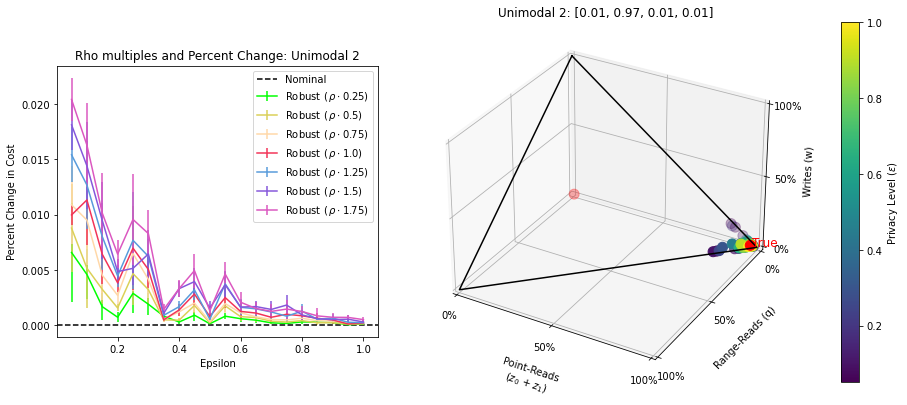

Average True ρ: 0.03183
Standard Dev True ρ: 0.08288


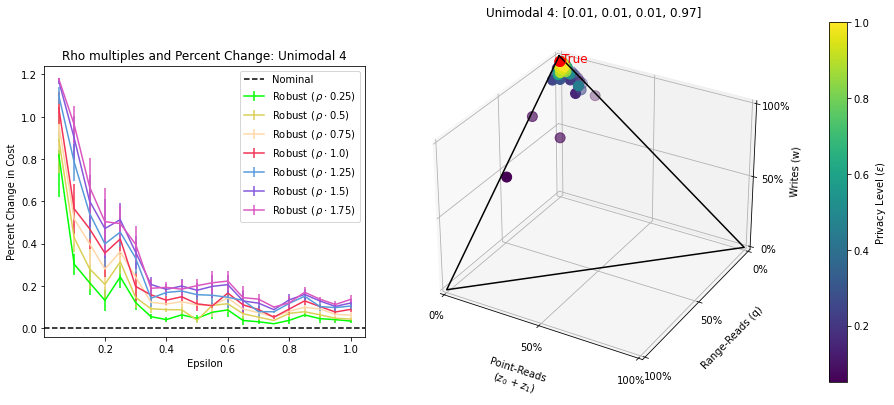

Average True ρ: 0.04047
Standard Dev True ρ: 0.1902


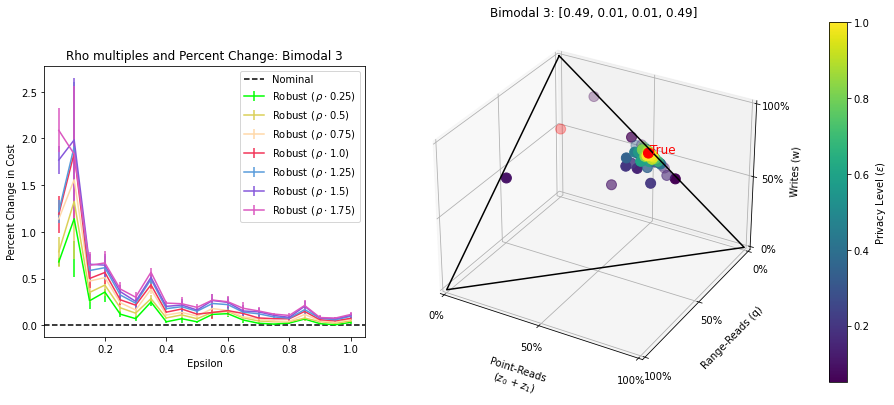

Average True ρ: 0.04164
Standard Dev True ρ: 0.12529


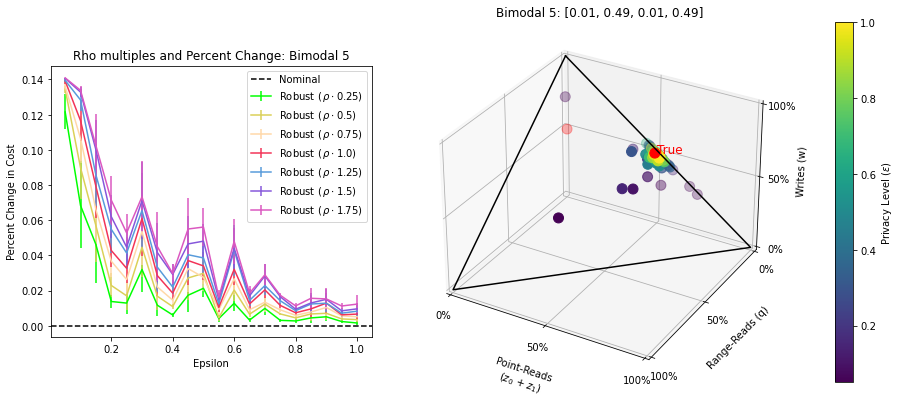

In [8]:
unstable = ['Unimodal_2.csv', 'Unimodal_4.csv', 'Bimodal_3.csv', 'Bimodal_5.csv']
for file in unstable: 
    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 0.3, 1])
    df = pd.read_csv(file)
    print("Average True \u03C1:", round(df['Rho (True)'].mean(), 5))
    print("Standard Dev True \u03C1:", round(df['Rho (True)'].std(), 5))
    ax1 = fig.add_subplot(gs[0])
    plot_rho_multiples(file, fig, ax1)
    ax2 = Axes3D(fig, auto_add_to_figure=False, computed_zorder=False)
    fig.add_axes(ax2)
    plot_workload(file, fig, ax2, anchor=(0.01, 0)) 
    #plot_workload_2d(file, fig, axs[1], outline_size=2, color_range=[0, 1], xmin=-0.05, xmax=1, ymin=-0.05, ymax=1) 
    plt.show()

Unimodal 2 has a similar distribution for its point queries (all around yellow or sligtly orange), but it has a noticable variation in writes or reads (spreads horizontally or vertically). This means usually when there's a noticable difference, it is only different in one type of operation (either reads or writes). This is why the range for unimodal 2 is actually pretty small (if you set ymin = 0 and ymax = 1, it is basically a flat line). 

Unimodal 4 is similar in point queries, but the workloads vary diagonally. This means a workload differs usually in two axes (reads and writes). It makes sense why there is a larger difference in cost for nominal and robust. 

Bimodal 3 vs. Bimodal 5
- They look very similar because the point queries change (dark purple, magenta, orange/yellow)
- We don't see a diagonal trend like unimodal 3 for both, but it seems like the lower $\epsilon$ points do differ in two axes (point queries and reads/writes)
- It seems like Bimodal 5 actulaly has more variation than Bimodal 3, so I would assume that Bimodal 5 would have a larger difference in cost. This is not the case. 
- It does seem like more points are overlapping in Bimodal 3 (tighter cluster). Maybe this is the reason?

Question: we might not be seeing the difference because z0 and z1 are combined. Is it okay if we combine them? 

#### Sharp Decline around $\varepsilon = 0.2$ and stays near 0 after (Common Trend)

Average True ρ: 0.04996
Standard Dev True ρ: 0.14341


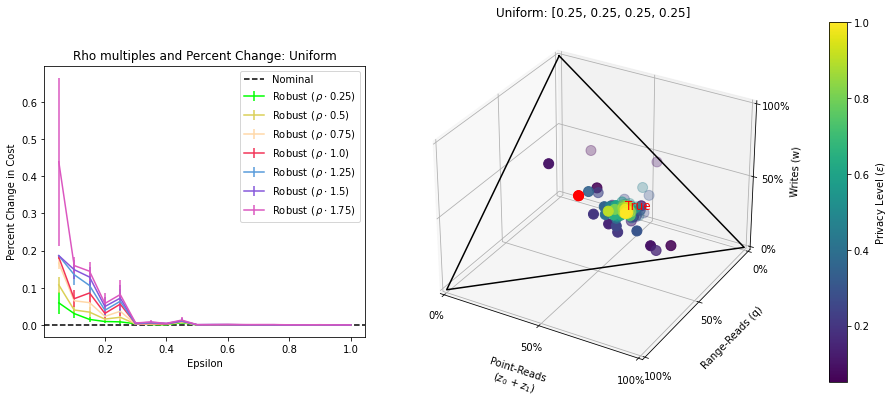

Average True ρ: 0.04904
Standard Dev True ρ: 0.13764


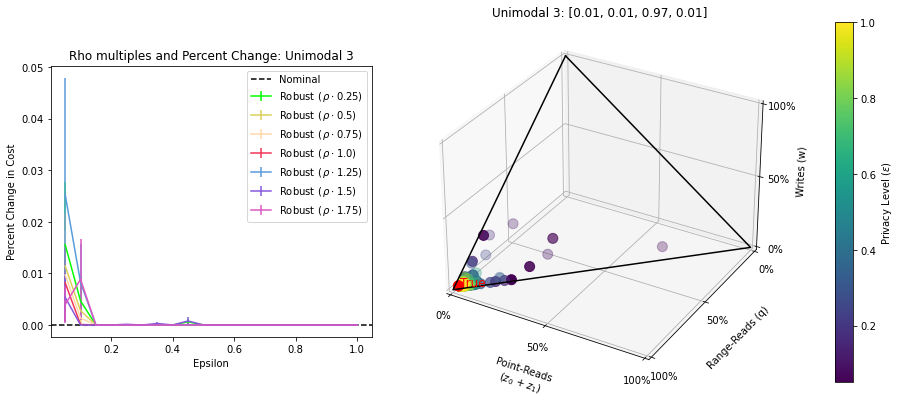

Average True ρ: 0.02319
Standard Dev True ρ: 0.04494


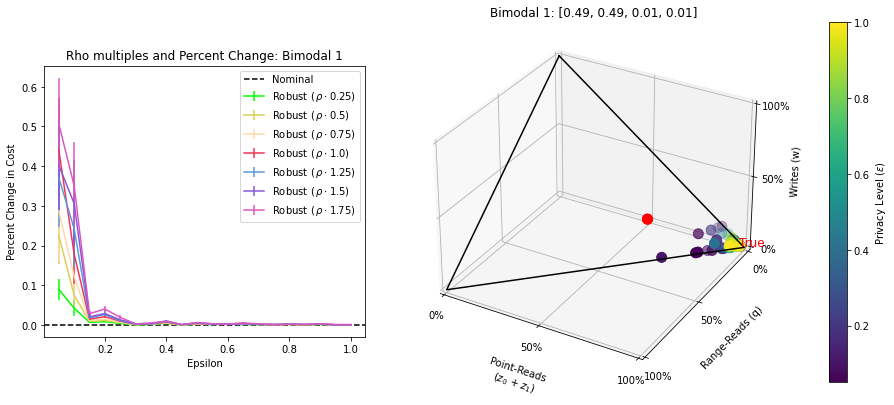

Average True ρ: 0.03301
Standard Dev True ρ: 0.12138


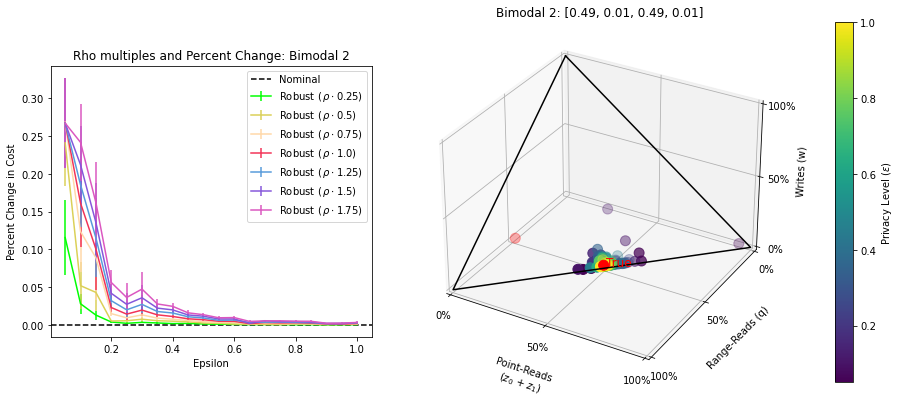

Average True ρ: 0.04068
Standard Dev True ρ: 0.15172


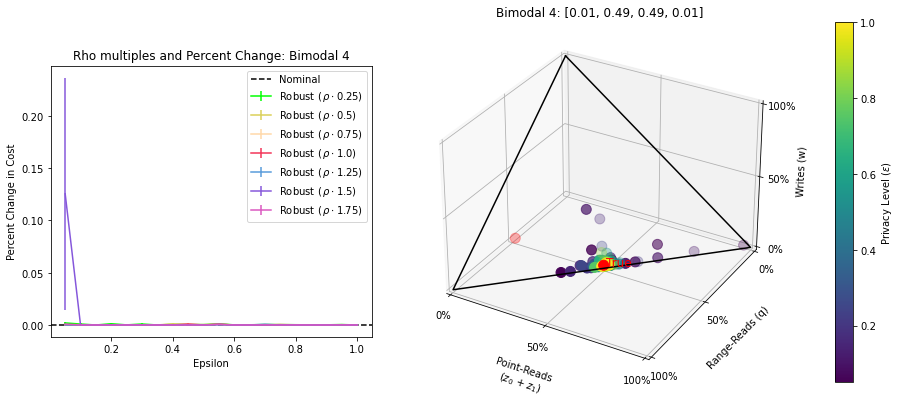

Average True ρ: 0.04331
Standard Dev True ρ: 0.17514


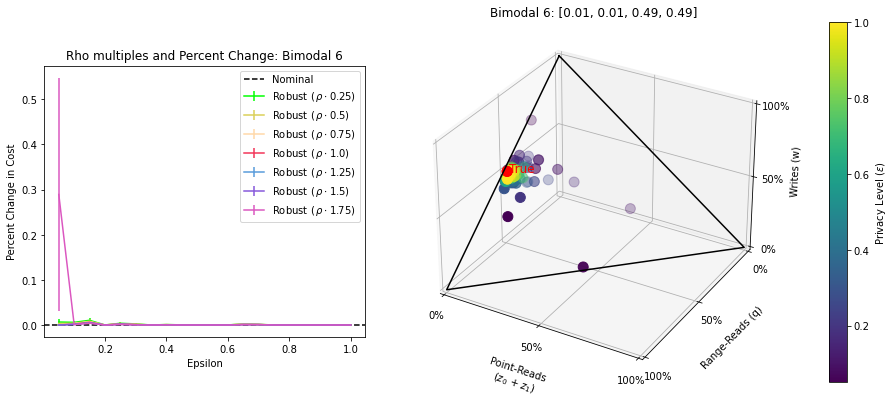

Average True ρ: 0.04265
Standard Dev True ρ: 0.15196


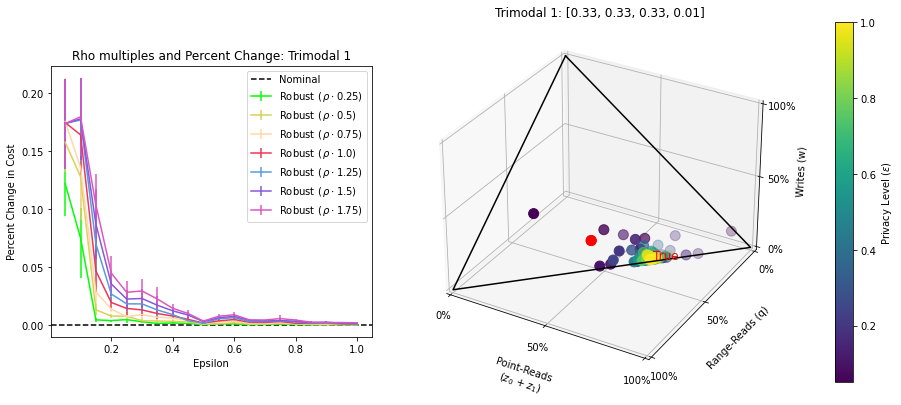

Average True ρ: 0.03405
Standard Dev True ρ: 0.11349


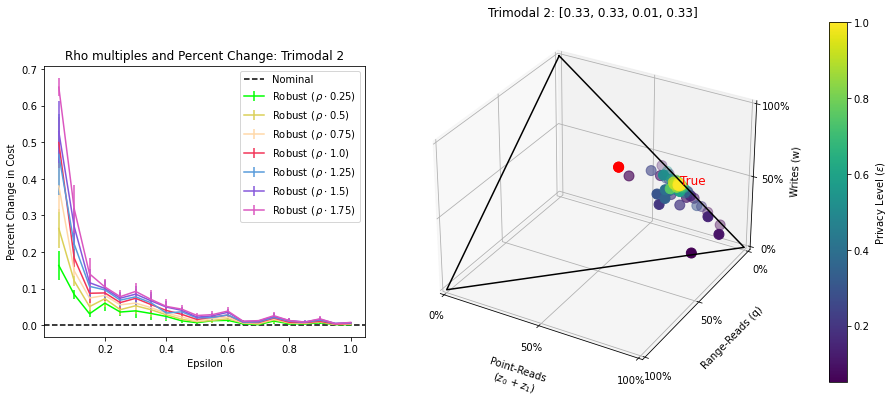

Average True ρ: 0.03064
Standard Dev True ρ: 0.10483


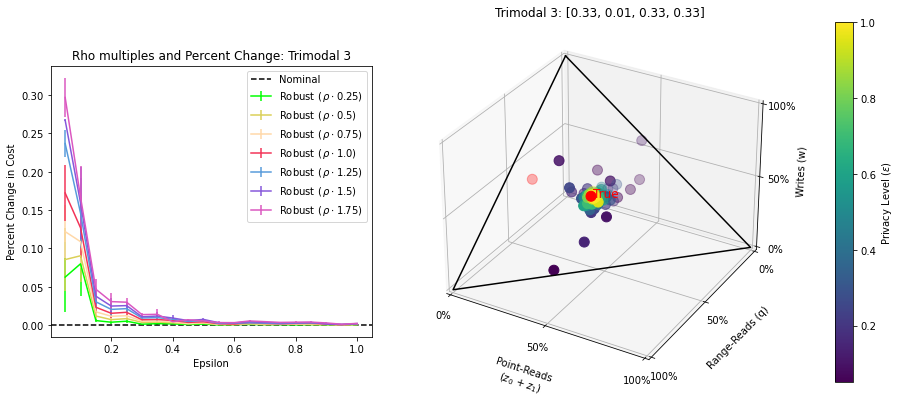

In [9]:
common = ['Uniform.csv', 'Unimodal_3.csv', 'Bimodal_1.csv', 
         'Bimodal_2.csv', 'Bimodal_4.csv', 'Bimodal_6.csv', 
         'Trimodal_1.csv', 'Trimodal_2.csv', 'Trimodal_3.csv']

for file in common: 
    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 0.3, 1])
    df = pd.read_csv(file)
    print("Average True \u03C1:", round(df['Rho (True)'].mean(), 5))
    print("Standard Dev True \u03C1:", round(df['Rho (True)'].std(), 5))
    ax1 = fig.add_subplot(gs[0])
    plot_rho_multiples(file, fig, ax1)
    ax2 = Axes3D(fig, auto_add_to_figure=False, computed_zorder=False)
    fig.add_axes(ax2)
    plot_workload(file, fig, ax2, anchor=(0.01, 0)) 
    #plot_workload_2d(file, fig, axs[1], outline_size=2, color_range=[0, 1], xmin=-0.05, xmax=1, ymin=-0.05, ymax=1) 
    plt.show()

Compared to the others, they form a more circular cluster, and it looks generally more tight. The range of the maximum difference in cost for $\varepsilon \leq 0.2$ differs based on the variation, though. 

#### Anomaly

Average True ρ: 0.02458
Standard Dev True ρ: 0.05459


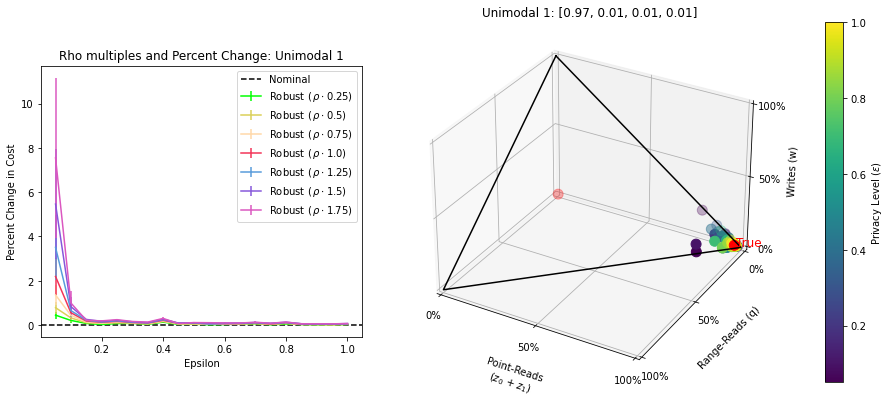

In [10]:
anomaly = 'unimodal_1.csv'
df = pd.read_csv(anomaly)
print("Average True \u03C1:", round(df['Rho (True)'].mean(), 5))
print("Standard Dev True \u03C1:", round(df['Rho (True)'].std(), 5))


fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 0.3, 1])
ax1 = fig.add_subplot(gs[0])
plot_rho_multiples(anomaly, fig, ax1)

# color_range is a list of min, max for the gradient, if none is given, it automatically scales
ax2 = Axes3D(fig, auto_add_to_figure=False, computed_zorder=False)
fig.add_axes(ax2)
plot_workload(anomaly, fig, ax2, anchor=(0.01, 0)) 

I separated this one because there is an extremely large difference in cost for $\varepsilon=0.05$ between robust and nominal. I found it a bit strange because the cluster seems more tight than the others. 